# Healthcare in Different States

In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures.

This dataset might look a bit familiar to you — we used it in our lesson about describing histograms. The data originally came from the <a href="https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3">United State Health and Human Services Department</a>.

Let us use boxplots to find more meaning in this data!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

healthcare = pd.read_csv("healthcare.csv")

1. We have imported the dataset into a variable named `healthcare`. Let us take a look at what data we have to work with. Print `healthcare.head()`. This will print the first five rows of the dataset.

    Scroll through the table to see what information we have. We know that we want to eventually look at the way heathcare works in different states. What column will be useful to do that?

In [2]:
healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


2. We are going to focus on only the ways in which hospitals charge patients for chest pain. But you could do this for any of the diagnoses in our dataset. Print `healthcare["DRG Definition"].unique()` to see all of the different diagnoses in our dataset.

    Can you find the official name of the diagnosis related to chest pain?

In [3]:
healthcare["DRG Definition"].unique()

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

'313 - CHEST PAIN'

3. Let us grab only the rows in the dataset that are about chest pain. Use this line of code to do that.

        chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

    If you are interested in investigating a different diagnosis, replace '313 - CHEST PAIN' with the name of the other diagnosis. You might want to change the new variable name to be something other than `chest_pain` if you do this!

In [4]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

## Separating By State

4. We now want to separate the dataset by state. Eventually, we will use a for loop to do this for every state, but for now, let us prove to ourselves that we can make a boxplot for one state.

    When we printed the head, we saw the first few rows had a `'Provider State'` of `"AL"`. Those were hospitals in Alabama.

    To get every chest pain diagnosis in Alabama, use this line of code:

        alabama_chest_pain = chest_pain[chest_pain['Provider State'] == "AL"]

    Make sure to use the variable that you created in the previous step. We called it `chest_pain`, but you might have named it something else if you used a different diagnosis.

    Again, feel free to use a state of your choosing instead of Alabama. Different state abbreviations should work, like `"CO"` or `"NY"`. Name your variable appropriately!

In [5]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == "AL"]

5. We are almost there! We now have all of the hospitals in Alabama that have a diagnosed chest pain. We now want to find the average cost of those diagnoses. These value is stored in the column `' Average Covered Charges '` (Note the spaces at the start and the end of the string!)

    To get only these values, call this line of code:

        costs = alabama_chest_pain[' Average Covered Charges '].values

    Again, make sure that you are using the correct variable names — yours might be different.

In [6]:
costs = alabama_chest_pain[' Average Covered Charges '].values

6. Let us now make a boxplot of those values! Call `plt.boxplot()` using `costs` as the first parameter.

    Then call `plt.show()` to see your boxplot!

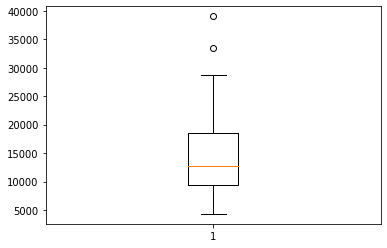

In [7]:
plt.boxplot(costs)
plt.show()

## Making a Boxplot for All States

7. Nice work! We have made a boxplot for one state. But how does that state compare to the others? Let us make a boxplot for every state! Comment out (or delete) the two lines of code you just wrote to make the boxplot.

    To begin, we first need to create a list of all the states in our dataset. We can once again use the `unique()` function. We used this function when we looked at all of the diagnoses.

    Find all of the unique states from the dataset `chest_pain` and store it in a variable named `states`.

In [8]:
states = chest_pain['Provider State'].unique()

8. We will now use a `for` loop to separate the dataset into a dataset for each state:

      datasets = []
      for state in states:
        datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

  `datasets` now contains 50 datasets — one for each state.

In [9]:
datasets = []
for state in states:
  datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

9. We are about to draw 50 boxplots. Before we draw them, let us make sure there is enough room. Call `plt.figure(figsize=(20,6))`. This will make your figure long to allow room for so many boxplots!

In [10]:
%%capture
plt.figure(figsize=(20,6))

10. Draw the boxplot using `datasets` as the first parameter. Add the second parameter `labels = states` to label your boxplots.

    Finally, make sure to call `plt.show()`.

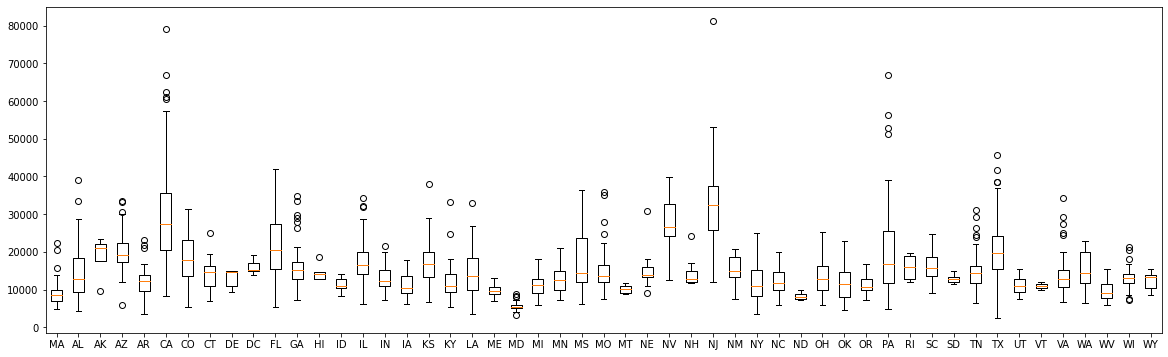

In [11]:
plt.figure(figsize=(20,6))
plt.boxplot(datasets, labels=states)
plt.show()

## Interpret and Explore

11. Nice work! You should now see 50 boxplots. If the graph is too small to see, you can expand it by clicking on the arrows in the top right corner of the right panel. You can also take a look at <a href="https://content.codecademy.com/courses/statistics/boxplot/states.png">this image</a> to see what your final results should look like.

    What information have you learned by looking at these boxplots side by side? What state has the largest spread? What state has the largest median? Which states have the most outliers?

*Hint: It looks like California, New Jersey, and Florida have the largest spreads. Vermont has almost no spread.*

*The state with the largest median cost for a chest pain diagnosis is New Jersey. The state with the smallest median cost is Maryland.*

*California, Georgia, and Tennessee all have a fair number of outliers.*

12. Take some time to explore more from here. Here are some ways in which you can investigate the data more:

* Look at diagnoses other than `'313 - CHEST PAIN'`.
* Group states by regions. Maybe hospitals in the Northeast charge patients differently than hospitals in the South.
* Plot something other than `' Average Covered Charges '`. You have data about how much Meidcare pays in the `'Average Medicare Payments'` column.